In [3]:
# ------------ Loading and Preprocessing --------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Step 1: Load the dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# Step 2: Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 3: Handle missing values
# Impute missing values for numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Impute missing values for categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Step 4: Encode categorical variables (e.g., CarName)
df = pd.get_dummies(df, columns=['CarName'], drop_first=True)

# Step 5: Feature scaling (if needed)
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 6: Split the data into features (X) and target (y)
X = df.drop('price', axis=1)  # 'price' is the target variable
y = df['price']

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the preprocessed data
print(X_train.head())

       car_ID  symboling fueltype aspiration doornumber    carbody drivewheel  \
66  -0.608337  -0.671472   diesel        std       four      sedan        rwd   
111  0.152084  -0.671472      gas        std       four      sedan        rwd   
153  0.861811  -0.671472      gas        std       four      wagon        fwd   
96  -0.101390   0.133509      gas        std       four      sedan        fwd   
38  -1.081488  -0.671472      gas        std        two  hatchback        fwd   

    enginelocation  wheelbase  carlength  ...  CarName_volkswagen type 3  \
66           front   1.022697   0.077250  ...                      False   
111          front   1.522109   1.027916  ...                      False   
153          front  -0.508831  -0.353393  ...                      False   
96           front  -0.708596  -0.710909  ...                      False   
38           front  -0.375655  -0.532151  ...                      False   

     CarName_volvo 144ea  CarName_volvo 145e (sw) CarNam

In [7]:
# -------------- Model Implementation ---------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# Step 1: Handle missing values
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Impute missing values for categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Step 2: Encode categorical columns using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Step 3: Split the dataset into features and target
X = df.drop('price', axis=1)
y = df['price']

# Step 4: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Step 7: Train and evaluate each model
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_results[name] = {
        'MSE': mse,
        'MAE': mae,
        'R-squared': r2
    }

# Convert results into a DataFrame
model_comparison = pd.DataFrame(model_results).T
print(model_comparison)

                                      MSE           MAE     R-squared
Linear Regression            6.896704e+32  1.394169e+16 -8.736195e+24
Decision Tree Regressor      1.053268e+07  2.098309e+03  8.665804e-01
Random Forest Regressor      3.675331e+06  1.387310e+03  9.534438e-01
Gradient Boosting Regressor  5.402849e+06  1.685616e+03  9.315610e-01
Support Vector Regressor     8.700167e+07  5.707022e+03 -1.020678e-01


In [9]:
# -------------- Model Evaluation ---------------

import pandas as pd

# Assuming the `model_comparison` DataFrame from the previous steps is already generated
print("Model Performance Comparison:")
print(model_comparison)

# Identify the best performing model based on R-squared, MSE, and MAE
# The model with the highest R-squared is considered the best
best_r2_model = model_comparison['R-squared'].idxmax()
best_mse_model = model_comparison['MSE'].idxmin()
best_mae_model = model_comparison['MAE'].idxmin()

print(f"\nBest Model Based on R-squared: {best_r2_model}")
print(f"Best Model Based on MSE: {best_mse_model}")
print(f"Best Model Based on MAE: {best_mae_model}")

Model Performance Comparison:
                                      MSE           MAE     R-squared
Linear Regression            6.896704e+32  1.394169e+16 -8.736195e+24
Decision Tree Regressor      1.053268e+07  2.098309e+03  8.665804e-01
Random Forest Regressor      3.675331e+06  1.387310e+03  9.534438e-01
Gradient Boosting Regressor  5.402849e+06  1.685616e+03  9.315610e-01
Support Vector Regressor     8.700167e+07  5.707022e+03 -1.020678e-01

Best Model Based on R-squared: Random Forest Regressor
Best Model Based on MSE: Random Forest Regressor
Best Model Based on MAE: Random Forest Regressor


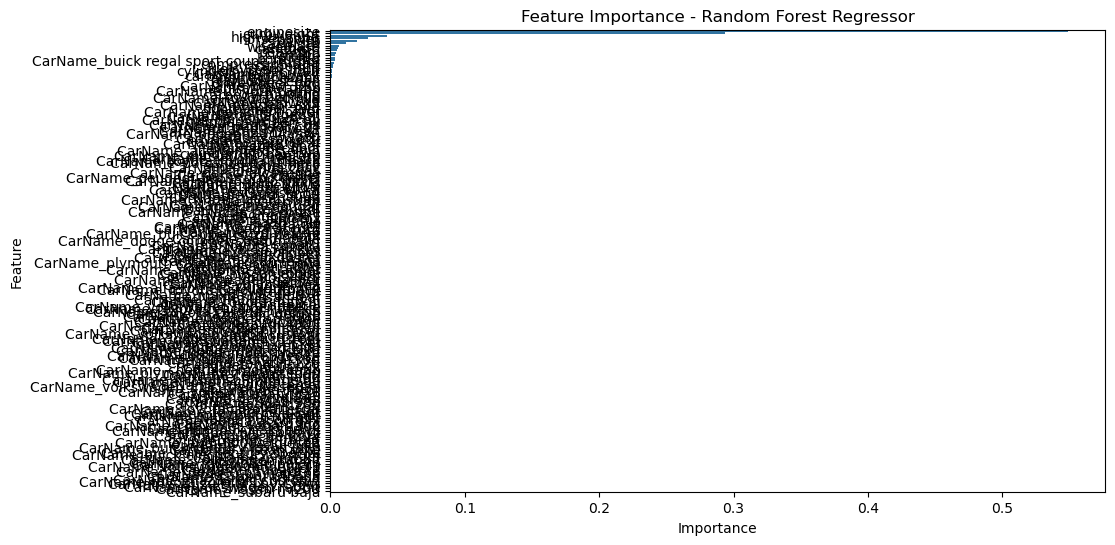

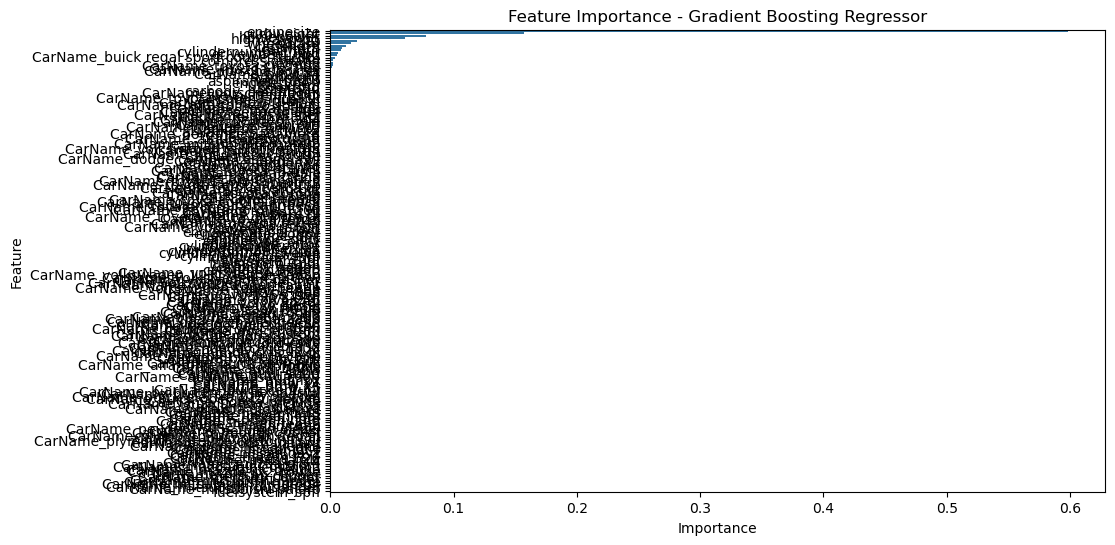

In [11]:
# -------------- Feature Importance Analysis ---------------

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest Regressor for feature importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get the feature importances from the Random Forest model
rf_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importances
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importances
})

# Sort the features by importance
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance)
plt.title("Feature Importance - Random Forest Regressor")
plt.show()

# Optionally, train a Gradient Boosting Regressor for comparison
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Get the feature importances from the Gradient Boosting model
gb_importances = gb_model.feature_importances_

# Create a DataFrame with feature names and their importances
gb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_importances
})

# Sort the features by importance
gb_feature_importance = gb_feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_feature_importance)
plt.title("Feature Importance - Gradient Boosting Regressor")
plt.show()

In [ ]:
# -------------- Hyperparameter Tuning ---------------

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the models and the hyperparameter grid for tuning

# Random Forest Regressor hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting Regressor hyperparameter grid
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}

# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

# Perform Grid Search for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)

# Print best parameters and best score for Random Forest
print("Best parameters for Random Forest: ", rf_grid_search.best_params_)
print("Best score (MSE) for Random Forest: ", -rf_grid_search.best_score_)

# Print best parameters and best score for Gradient Boosting
print("Best parameters for Gradient Boosting: ", gb_grid_search.best_params_)
print("Best score (MSE) for Gradient Boosting: ", -gb_grid_search.best_score_)

# Evaluate performance on test data using the tuned models
rf_best_model = rf_grid_search.best_estimator_
gb_best_model = gb_grid_search.best_estimator_

# Predictions with tuned Random Forest
rf_y_pred = rf_best_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)

# Predictions with tuned Gradient Boosting
gb_y_pred = gb_best_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_mae = mean_absolute_error(y_test, gb_y_pred)

# Display performance comparison
print("\nRandom Forest Regressor - Tuned Model Performance:")
print(f"R-squared: {rf_r2:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"MAE: {rf_mae:.4f}")

print("\nGradient Boosting Regressor - Tuned Model Performance:")
print(f"R-squared: {gb_r2:.4f}")
print(f"MSE: {gb_mse:.4f}")
print(f"MAE: {gb_mae:.4f}")